# TP Neural Networks for Classification
Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2024-2025

In [68]:
import numpy as np
import torch
import keras
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## Neural network as a function approximator

In this first part, your goal is to learn the following mathematical function as a separation from 2 classes: positives (resp. negatives) data for which the function is positive (resp. negative). The code provided in this section will help you to start. This code is running without errors but the quality of the result is poor. Your goal is to improve this code.

In [7]:
def myFunction(x):
    return x[:,1] - 0.55-(x[:,0]+2*(x[:,0]*10)**2-(x[:,0]*10)**3)*torch.exp(-x[:,0]*10)

In [9]:
def myFunctionSep(x):
    return  0.55+(x+2*(x*10)**2-(x*10)**3)*torch.exp(-x*10)

### generation of the dataset (samples from 'myFunction')

In [12]:
nbData = 1000
X = torch.rand(nbData,2)
print(X.shape)
noise = (torch.rand(nbData)-0.5)/50
ySep = myFunction(X)
y = np.array([0 if lab < 0 else 1 for lab in ySep])

torch.Size([1000, 2])


<font color="green"><b>Question:</b></font> Split the data set into train/test sets. Start using the same method as last week (split on indices).

In [35]:
indices = torch.randperm(nbData)
split = int(0.8 * nbData)

train_indices = indices[:split]
test_indices = indices[split:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = torch.tensor(y[train_indices])
y_test = torch.tensor(y[test_indices])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: torch.Size([800, 2])
X_test shape: torch.Size([200, 2])
y_train shape: torch.Size([800])
y_test shape: torch.Size([200])


<font color="green"><b>Question:</b></font> Plot the train and test sets using different colors

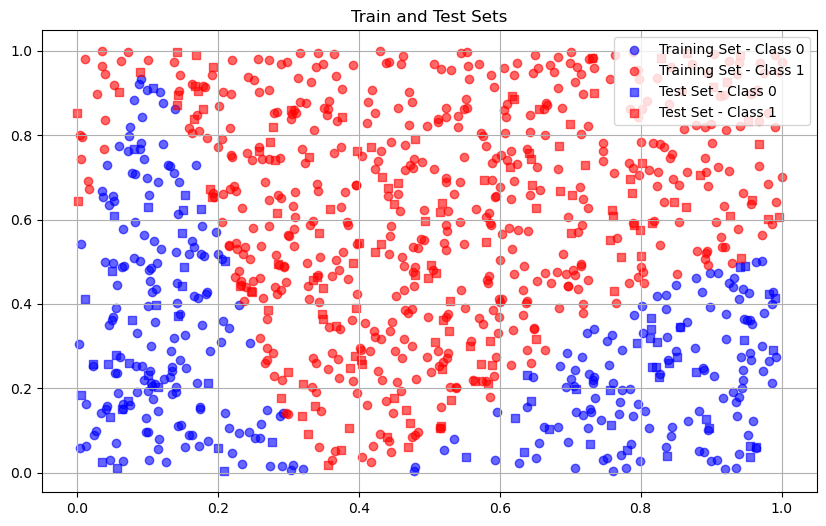

In [92]:
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()

# Create a scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(X_train_np[y_train == 0, 0], X_train_np[y_train == 0, 1], 
            color='blue', label='Training Set - Class 0', alpha=0.6, marker='o')  # cercles
plt.scatter(X_train_np[y_train == 1, 0], X_train_np[y_train == 1, 1], 
            color='red', label='Training Set - Class 1', alpha=0.6, marker='o')


plt.scatter(X_test_np[y_test == 0, 0], X_test_np[y_test == 0, 1], 
            color='blue', label='Test Set - Class 0', alpha=0.6, marker='s')  # carrés
plt.scatter(X_test_np[y_test == 1, 0], X_test_np[y_test == 1, 1], 
            color='red', label='Test Set - Class 1', alpha=0.6, marker='s')

# Adding labels and title
plt.title('Train and Test Sets')
plt.legend()
plt.grid(True)

### the neural network

In [39]:
#topology
model = Sequential()
model.add(keras.Input(shape=(2,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

<font color="green"><b>Question:</b></font> Display the architecture and the number of parameters you will have to learn (method 'summary').

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

<font color="green"><b>Question:</b></font> Learn this network using an EarlyStopping criterion as you did last week

In [49]:
ourCallback = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, 
    patience=20, 
    verbose=0, 
    mode='auto', 
    baseline=None, 
    restore_best_weights=True)

history = model.fit(
    X_train.numpy(), 
    y_train.numpy(),
    epochs = 100,
    batch_size = 32,
    validation_data = (X_test.numpy(), y_test.numpy()),
    callbacks=[ourCallback],
    verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6291 - loss: 0.6674 - val_accuracy: 0.6650 - val_loss: 0.6462
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - loss: 0.6551 - val_accuracy: 0.6650 - val_loss: 0.6404
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 0.6615 - val_accuracy: 0.6650 - val_loss: 0.6367
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6433 - loss: 0.6471 - val_accuracy: 0.6650 - val_loss: 0.6345
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6317 - loss: 0.6511 - val_accuracy: 0.6650 - val_loss: 0.6326
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6353 - val_accuracy: 0.6650 - val_loss: 0.6313
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.6401 - val_accuracy: 0.6650 - val_loss: 0.6297
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 0.6628 - val_accuracy: 0.6650 - v

<font color="green"><b>Question:</b></font> Plot the history. Are you satisfied with the convergence?

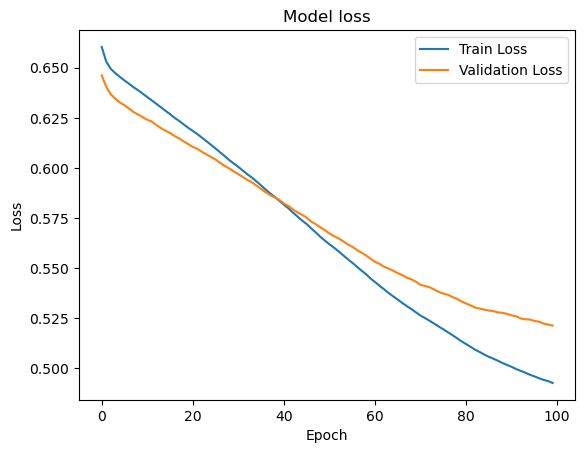

In [55]:
plt.plot(history.history["loss"], label='Train Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<font color="green"><b>Question:</b></font> Display the confusion matrix and classification metrics. Is it good?

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Classification Report : 
              precision    recall  f1-score   support

     Class 0       0.56      0.49      0.52        67
     Class 1       0.76      0.80      0.78       133

    accuracy                           0.70       200
   macro avg       0.66      0.65      0.65       200
weighted avg       0.69      0.70      0.69       200



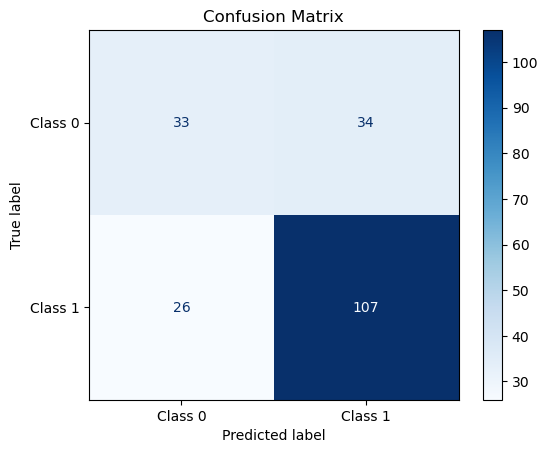

In [74]:
y_pred_probs = model.predict(X_test.numpy())
y_pred = (y_pred_probs > 0.5).astype(int)

y_test_np = y_test.numpy()

cm = confusion_matrix(y_test_np, y_pred)

report = classification_report(y_test_np, y_pred, target_names=['Class 0', 'Class 1'])

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

print("Classification Report : ")
print(report)

<font color="green"><b>Question:</b></font> In the case of 2d data, it is also possible to plot again the theoretical curve (the 'truth') along with the prediction for the train and the test sets (using different colors). Are you satisfied with the result?

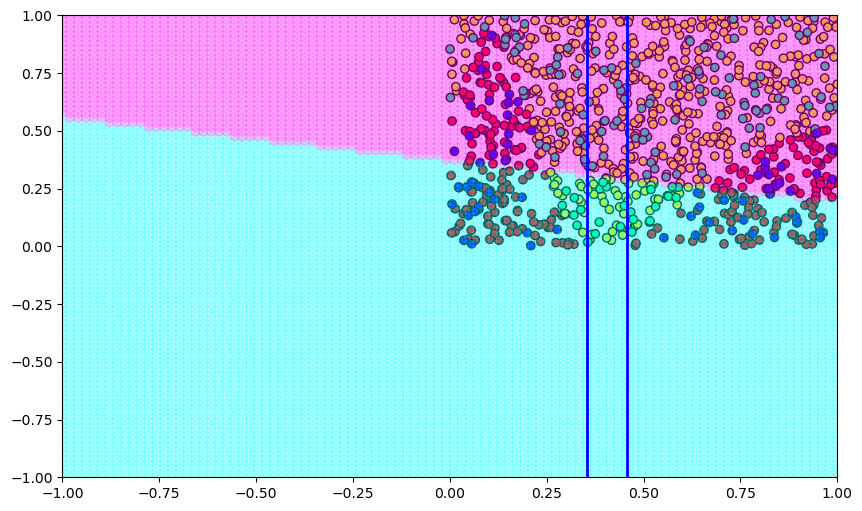

In [112]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=(10, 6))
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Plot theoretical curve
z = myFunctionSep(grid_tensor[:,0])
plt.contour(xx, yy, z.reshape(xx.shape), levels=[0], colors='blue', linewidths=2)

# Scatter plot for training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', label='Training Data', edgecolors='k')

# Scatter plot for test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', label='Test Data', edgecolors='k')

# Overlay predictions
plt.scatter(grid[:, 0], grid[:, 1], c=predictions.flatten(), cmap='cool', alpha=0.2)

<font color="green"><b>Question:</b></font> Looking at this picture and previous metrics, you may observe that it could be possible to better perform. This means that you have not learned the correct functions using your neural network. As you did with the regression case last we, improve this neural network.
Clues:
- number of neurons per layer
- number of hidden layers
- activations
- batch size
- size of dataset

In [ ]:
# your work here

### Other experiment:

In [ ]:
#For this section, install codecarbon if not already installed:
!conda install -c conda-forge codecarbon

Choose one of these experiments:
- only one hidden layer with a variable number of neurons
- a fixed number of neurons per hidden layers but with a variable number of hidden layers
- a fixed number of neurons (let's say 840 for example) that is spread among a variable number of layers (840 on 1 hidden layer, 420 on 2 hidden layers, ...).

Choose several values for the variable parameter and plot accuracy and co2 consumption (using codecarbon) with respect to this variable parameter. Save the plot in a pdf file and post it to slack (#si4-deep-learning). The title of the figure should explain what has been done. Don't forget the axis legend.

In [ ]:
# your work here
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()
# code here
co2 = tracker.stop()

## Classification using a simple dataset: MNIST

In this section, you will use another dataset that you can load using the sklearn library: <a href='https://keras.io/api/datasets/mnist/'>MNIST dataset</a>

In [197]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [198]:
# your work

<font color="green"><b>Question:</b></font> Build, learn and evaluate a first simple neural networks. 

In [184]:
# your work

<font color="green"><b>Question:</b></font> Try differente improvements (number of layers, size of layers, activations ...) and compare performances, number of paramaters to learn and cost.

In [ ]:
# your work